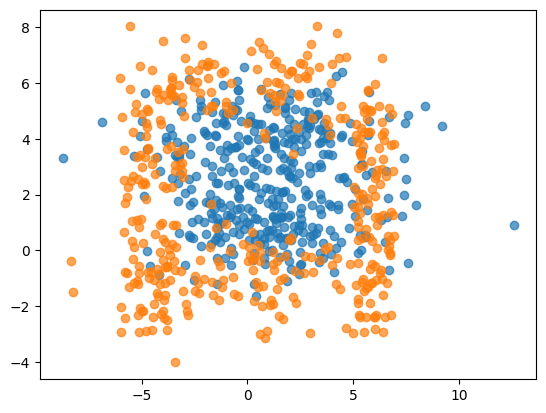

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Number of data points
num_points = 400
u_num_points = 100
n_num_points = 200
# Generate data for x-axis (univariate Gaussian)
mean_x = 1
std_dev_x = 3
x_values = np.random.normal(mean_x, std_dev_x, num_points)

# Generate data for y-axis (mixture Gaussian with 2 modes)
mean_y1, mean_y2 = 1, 4
std_dev_y1, std_dev_y2 = 1, 1

# Randomly choose between mode 1 and mode 2 for each data point
mode_selector = np.random.randint(0, 2, num_points)

# Generate y values based on the selected mode
y_values = np.where(mode_selector == 0, 
                    np.random.normal(mean_y1, std_dev_y1, num_points), 
                    np.random.normal(mean_y2, std_dev_y2, num_points))

# Generate data for x-axis (univariate Gaussian)
mean_b_x1, mean_b_x2 = -2.5, 2
std_dev_b_x1,std_dev_b_x2 = 2,2
x_mode_selector = np.random.randint(0, 2, n_num_points)
b_x_values = np.where(x_mode_selector == 0, 
                    np.random.normal(mean_b_x1, std_dev_b_x1, n_num_points), 
                    np.random.normal(mean_b_x2, std_dev_b_x2, n_num_points))

# Generate data for y-axis (mixture Gaussian with 2 modes)
mean_b_y1, mean_b_y2, mean_b_y3 = -1, 6,2
std_dev_b_y1, std_dev_b_y2,std_dev_b_y3 = 1, 1, 0.2

# Randomly choose between mode 1 and mode 2 for each data point
y_mode_selector = np.random.randint(0, 2, n_num_points)

# Generate y values based on the selected mode
# b_y_values = np.where(y_mode_selector == 0, 
#                     np.random.normal(mean_b_y1, std_dev_b_y1, num_points), 
#                     np.where(y_mode_selector == 1, 
#                              np.random.normal(mean_b_y2, std_dev_b_y2, num_points),
#                              np.random.normal(mean_b_y3, std_dev_b_y3, num_points)))
b_y_values = np.where(y_mode_selector == 0, 
                    np.random.normal(mean_b_y1, std_dev_b_y1, n_num_points), 
                    np.random.normal(mean_b_y2, std_dev_b_y2, n_num_points))
c_x_values = np.random.uniform(-6,-3,size=u_num_points)
c_y_values = np.random.uniform(-3,6,size=u_num_points)

d_x_values = np.random.uniform(5,7,size=u_num_points)
d_y_values = np.random.uniform(-3,6,size=u_num_points)

b_x_values = np.concatenate([b_x_values,c_x_values,d_x_values])
b_y_values = np.concatenate([b_y_values,c_y_values,d_y_values])

# Create scatter plot
plt.scatter(x_values, y_values, alpha=0.7)
plt.scatter(b_x_values, b_y_values, alpha=0.7)
#plt.xlim(-6,6)
#plt.ylim(-6,10)
# plt.title('2D Scatter Plot with Gaussian Distributions')
# plt.xlabel('X-axis (Univariate Gaussian)')
# plt.ylabel('Y-axis (Mixture Gaussian with 2 Modes)')

# Show the plot
plt.show()


In [108]:
a_X = np.hstack([x_values.reshape(-1,1),y_values.reshape(-1,1)])
a_Y = np.ones(a_X.shape[0])
a_X.shape

(400, 2)

In [109]:
b_X = np.hstack([b_x_values.reshape(-1,1),b_y_values.reshape(-1,1)])
b_Y = np.zeros(b_X.shape[0])
b_X.shape

(400, 2)

In [110]:
X = np.vstack([a_X,b_X])
Y = np.concatenate([a_Y,b_Y])

In [111]:
import sys
import os
from importlib import reload
here = os.getcwd()
sys.path.append(os.path.join(here,"../"))

In [119]:
import explainer.rule_pattern_miner as rlm
y_rule_candidates = rlm.gen_rule_list_for_one_target(X,[0,1],Y==1,y=Y,c=1,sort_by="cond_prob_y",
                                                            min_support=200,num_grids=20,max_depth=2,top_K=3,
                                                            local_x=None,feature_types=None,search="greedy",
                                                            verbose=False)


y_rule_candidates

build_rule_tree
init rule tree
search rule for feature 0
search rule for feature 1
best rule 1 1.453781512605042
check potential rule 1 1.453781512605042 0.4176853417451607 2.9532267689257248 238
add rule [] 1 (1.453781512605042, 0.4176853417451607, 2.9532267689257248, 238)
search rule for feature 0
best rule 0 1.1194605009633911
check potential rule 0 1.1194605009633911 -3.1232766275305384 12.558194471964164 204
add rule [1] 0 (1.1194605009633911, -3.1232766275305384, 12.558194471964164, 204)
check potential rule 0 1.0804761527700795 -4.2433817060658745 12.558194471964164 219
add rule [1] 0 (1.0804761527700795, -4.2433817060658745, 12.558194471964164, 219)
check potential rule 0 1.0804761527700795 -4.2433817060658745 12.558194471964164 219
add rule [1] 0 (1.0804761527700795, -4.2433817060658745, 12.558194471964164, 219)
check potential rule 1 1.4349030470914128 0.4176853417451607 4.220997482516006 361
add rule [] 1 (1.4349030470914128, 0.4176853417451607, 4.220997482516006, 361)
searc

[{'rules': [(1, '>=', 0.4176853417451607),
   (1, '<=', 4.220997482516006),
   (0, '>=', -2.003171548995203),
   (0, '<=', 4.717458922216812)],
  'cond_prob_target': 0.9607843137254902,
  'support': 204,
  'cond_prob_y': 0.9607843137254902,
  'ratio_y': 0.49},
 {'rules': [(1, '>=', 0.4176853417451607),
   (1, '<=', 2.9532267689257248),
   (0, '>=', -3.1232766275305384)],
  'cond_prob_target': 0.8137254901960784,
  'support': 204,
  'cond_prob_y': 0.8137254901960784,
  'ratio_y': 0.415},
 {'rules': [(1, '>=', 0.4176853417451607),
   (1, '<=', 4.220997482516006),
   (0, '<=', 4.717458922216812)],
  'cond_prob_target': 0.8118466898954704,
  'support': 287,
  'cond_prob_y': 0.8118466898954704,
  'ratio_y': 0.5825},
 {'rules': [(1, '>=', 0.4176853417451607),
   (1, '<=', 4.220997482516006),
   (0, '>=', -3.1232766275305384)],
  'cond_prob_target': 0.7993311036789298,
  'support': 299,
  'cond_prob_y': 0.7993311036789298,
  'ratio_y': 0.5975},
 {'rules': [(1, '>=', 0.4176853417451607),
   (1

In [120]:
import seaborn as sns

In [121]:
rules = y_rule_candidates[0]["rules"]
rules

[(1, '>=', 0.4176853417451607),
 (1, '<=', 4.220997482516006),
 (0, '>=', -2.003171548995203),
 (0, '<=', 4.717458922216812)]

In [122]:
y_split_1 = rules[0][-1]
y_split_2 = rules[1][-1]
x_split_1 = rules[2][-1]
x_split_2 = rules[3][-1]

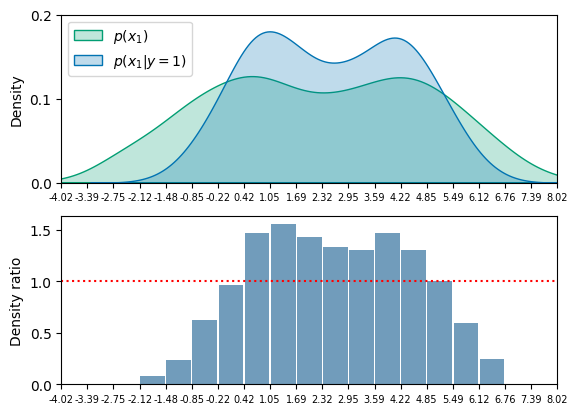

In [126]:
y_grids = np.linspace(X[:,1].min(),X[:,1].max(),20) 
y_ratios,y_supports = rlm.scan_feature_cond_prob_ratio(X[:,1],Y==1,y_grids,prev_cond_indices=None)
y_ratios[y_ratios==-1] = 0
# y_ratios_2,y_supports_2 = rlm.scan_feature_cond_prob_ratio(X[:,1][Y==1],a_Y.astype(bool),y_grids,prev_cond_indices=(X[:,0]>=x_split))
# y_ratios_3,y_supports_3 = rlm.scan_feature_cond_prob_ratio(X[:,1][Y==0],a_Y.astype(bool),y_grids,prev_cond_indices=None)

# plt.figure(figsize=(40, 12))
color_palette = sns.color_palette("colorblind")

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False)
s = 0
# sns.histplot(x_values,bins=20,alpha=0.3,kde=False,ax=ax1)
# sns.barplot(x=y_grids[s:-1],y=y_supports_3[s:],width=0.95,saturation=0.8,alpha=0.6,ax=ax1)
# sns.barplot(x=y_grids[s:-1],y=y_supports_2[s:],width=0.95,saturation=0.8,alpha=0.6,ax=ax1)
sns.kdeplot(X[:,1],fill=True,color=color_palette[2],ax=ax1)
sns.kdeplot(y_values,fill=True,color=color_palette[0],ax=ax1)


# ax1.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False)
ax1.legend([r"$p(x_1)$",r"$p(x_1|y=1)$"],loc=2)
ax1.set_xticks([y_grids[i] for i in range(s,20)],labels=[y_grids[i].round(2) for i in range(s,20)],fontsize=7)
ax1.set_xlim(y_grids[s],y_grids[-1])
ax1.set_yticks([0,0.1,0.2])

sns.barplot(x=y_grids[s:-1],y=y_ratios[s:],width=0.95,saturation=0.7,alpha=0.7,ax=ax2)
ax2.plot([-0.5,18.5],[1,1],"r:")
# ax = sns.barplot(x=grids[3:-1],y=x_ratios[3:],width=0.95,saturation=0.7)
ax2.set_xlim(0,18)
ax2.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False)
ax2.set_xticks([i-0.5 for i in range(20-s)],labels=[y_grids[i].round(2) for i in range(s,20)],fontsize=7)
ax2.set_ylabel("Density ratio")
plt.savefig("./results/y_density_mode_demo.svg",bbox_inches="tight")

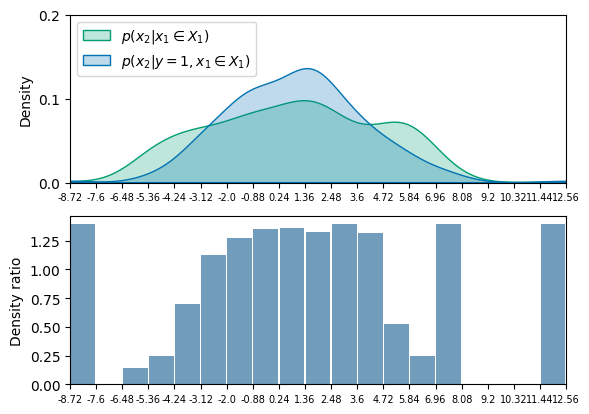

In [127]:
# plt.figure(figsize=(40, 12))

grids = np.linspace(X[:,0].min(),X[:,0].max(),20) 
x_ratios,x_supports = rlm.scan_feature_cond_prob_ratio(X[:,0],Y==1,grids,prev_cond_indices=((X[:,1]>=y_split_1)&(X[:,1]<=y_split_2))) #
x_ratios[x_ratios==-1]=0
# x_ratios_2,x_supports_2 = rlm.scan_feature_cond_prob_ratio(X[:,0][Y==1],a_Y.astype(bool),grids,prev_cond_indices=None)
# x_ratios_3,x_supports_3 = rlm.scan_feature_cond_prob_ratio(X[:,0][Y==0],a_Y.astype(bool),grids,prev_cond_indices=None)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False)
s=0
# sns.histplot(x_values,bins=20,alpha=0.3,kde=False,ax=ax1)
# sns.barplot(x=grids[s:-1],y=x_supports[s:],width=0.95,saturation=0.8,alpha=0.6,ax=ax1)
# sns.barplot(x=grids[s:-1],y=x_supports_2[s:],width=0.95,saturation=0.8,alpha=0.6,ax=ax1)

sns.kdeplot(X[:,0][((X[:,1]>=y_split_1)&(X[:,1]<=y_split_2))],fill=True,color=color_palette[2],ax=ax1) #[(X[:,1]>=y_split_1)&(X[:,1]<=y_split_2)]
sns.kdeplot(x_values[((y_values>=y_split_1)&(y_values<=y_split_2))],fill=True,color=color_palette[0],ax=ax1) #[(y_values>=y_split_1)&(y_values<=y_split_2)]
# sns.kdeplot(b_x_values,fill=True,color=color_palette[1],ax=ax1)

# ax1.set_xlim(grids[3],grids[-1])
ax1.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False)
ax1.set_xticks([grids[i] for i in range(20-s)],labels=[grids[i].round(2) for i in range(s,20)],fontsize=7)
ax1.set_xlim(grids[s],grids[-1])
ax1.set_yticks([0,0.1,0.2])
ax1.legend([r"$p(x_2|x_1 \in X_1)$",r"$p(x_2|y=1,x_1 \in X_1)$"],loc=2)

sns.barplot(x=grids[s:-1],y=x_ratios[s:],width=0.95,saturation=0.7,alpha=0.7,ax=ax2)

# ax = sns.barplot(x=grids[3:-1],y=x_ratios[3:],width=0.95,saturation=0.7)
ax2.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False)
ax2.set_xticks([i-0.5 for i in range(20-s)],labels=[grids[i].round(2) for i in range(s,20)],fontsize=7)
ax2.set_ylabel("Density ratio")
plt.savefig("./results/x_density_mode_demo.svg",bbox_inches="tight")

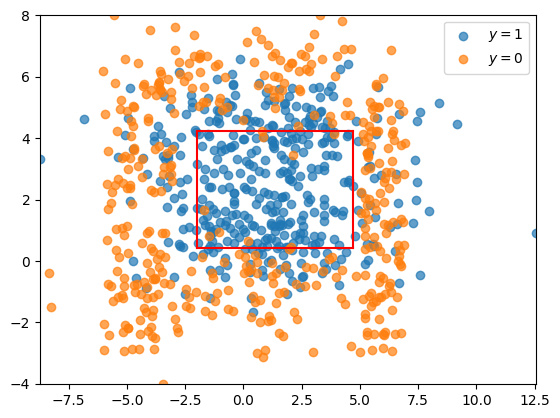

In [128]:
plt.scatter(X[:,0][Y==1],X[:,1][Y==1],alpha=0.7)
plt.scatter(X[:,0][Y==0],X[:,1][Y==0],alpha=0.7)
plt.plot([x_split_1,x_split_1],[y_split_1,y_split_2],"r-")
plt.plot([x_split_1,x_split_2],[y_split_1,y_split_1],"r-")
plt.plot([x_split_2,x_split_2],[y_split_1,y_split_2],"r-")
plt.plot([x_split_1,x_split_2],[y_split_2,y_split_2],"r-")
plt.xlim(grids[0],grids[-1])
plt.ylim(y_grids[0],y_grids[-1])
plt.legend(["$y=1$","$y=0$"])
plt.savefig("./results/scatter_data_demo.svg",bbox_inches="tight")

In [165]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.tree import plot_tree,export_text,export_graphviz
import explainer.DT_rules as dtr
from explainer.DT_rules import obtain_rule_lists_from_DT,select_rule_list

In [166]:
treemodel = DecisionTreeClassifier(max_depth=8,min_samples_leaf=100,random_state=0)
treemodel.fit(X,Y)
input_feature_names = ["f"+str(i) for i in range(2)]
#y_pred_tree = treemodel.predict(X_test)
rule_list, rule_value_list, rule_support_list, new_lines = dtr.obtain_rule_lists_from_DT(treemodel,5,X,Y,Y==1,np.arange(X.shape[-1]),input_feature_names,c=1)
len(rule_list)

4

In [167]:
print(export_text(treemodel))

|--- feature_0 <= -0.98
|   |--- feature_0 <= -2.23
|   |   |--- class: 0.0
|   |--- feature_0 >  -2.23
|   |   |--- class: 0.0
|--- feature_0 >  -0.98
|   |--- feature_0 <= 0.93
|   |   |--- class: 1.0
|   |--- feature_0 >  0.93
|   |   |--- class: 1.0



In [181]:
## print rules from DecisionTreeClassifier
select = [[],[],[]]

for s in range(len(rule_list)):
    select[0].append(rule_list[s])
    select[2].append(rule_support_list[s])
    print('#################')
    print(rule_list[s])
    print('cond_prob_target',rule_support_list[s][1].round(3),'cond_prob_y',rule_support_list[s][2].round(3),'size',rule_support_list[s][0])
    for r in rule_list[s]:
        print(input_feature_names[r[0]],r[1],r[2])

#################
[(0, '<=', -2.226)]
cond_prob_target 0.066 cond_prob_y 0.066 size 167
f0 <= -2.226
#################
[(0, '<=', -0.981), (0, '>', -2.226)]
cond_prob_target 0.343 cond_prob_y 0.343 size 108
f0 <= -0.981
f0 > -2.226
#################
[(0, '>', -0.981), (0, '<=', 0.926)]
cond_prob_target 0.612 cond_prob_y 0.612 size 152
f0 > -0.981
f0 <= 0.926
#################
[(0, '>', 0.926)]
cond_prob_target 0.919 cond_prob_y 0.919 size 173
f0 > 0.926


In [182]:
select[0]

[[(0, '<=', -2.226)],
 [(0, '<=', -0.981), (0, '>', -2.226)],
 [(0, '>', -0.981), (0, '<=', 0.926)],
 [(0, '>', 0.926)]]

In [187]:
y_split_1 = select[0][0][0][-1]
y_split_2 = select[0][2][0][-1]
y_split_3 = select[0][-1][0][-1]
y_split_1,y_split_2,y_split_3

(-2.226, -0.981, 0.926)

(-6.0, 10.0)

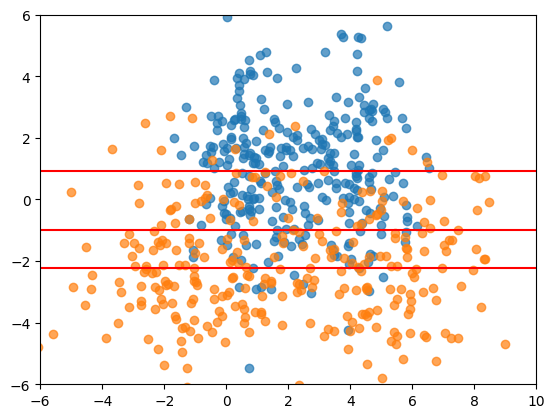

In [188]:
plt.scatter(X[:,1][Y==1],X[:,0][Y==1],alpha=0.7)
plt.scatter(X[:,1][Y==0],X[:,0][Y==0],alpha=0.7)
plt.plot([-6,10],[y_split_1,y_split_1],"r-")
plt.plot([-6,10],[y_split_2,y_split_2],"r-")
plt.plot([-6,10],[y_split_3,y_split_3],"r-")
# plt.plot([x_split,4],[y_split_2,y_split_2],"r-")
plt.ylim(-6,6)
plt.xlim(-6,10)

In [103]:
treemodel = DecisionTreeClassifier(max_depth=8,min_samples_leaf=50,random_state=0)
treemodel.fit(X,Y)
input_feature_names = ["f"+str(i) for i in range(2)]
#y_pred_tree = treemodel.predict(X_test)
rule_list, rule_value_list, rule_support_list, new_lines = dtr.obtain_rule_lists_from_DT(treemodel,5,X,Y,Y==1,np.arange(X.shape[-1]),input_feature_names,c=1)
len(rule_list)

9

In [104]:
print(export_text(treemodel))

|--- feature_0 <= -0.98
|   |--- feature_0 <= -2.12
|   |   |--- feature_1 <= 0.35
|   |   |   |--- class: 0.0
|   |   |--- feature_1 >  0.35
|   |   |   |--- feature_0 <= -3.09
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_0 >  -3.09
|   |   |   |   |--- class: 0.0
|   |--- feature_0 >  -2.12
|   |   |--- class: 0.0
|--- feature_0 >  -0.98
|   |--- feature_0 <= 0.93
|   |   |--- feature_1 <= 1.00
|   |   |   |--- class: 1.0
|   |   |--- feature_1 >  1.00
|   |   |   |--- class: 1.0
|   |--- feature_0 >  0.93
|   |   |--- feature_0 <= 2.70
|   |   |   |--- feature_1 <= 1.39
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_1 >  1.39
|   |   |   |   |--- class: 1.0
|   |   |--- feature_0 >  2.70
|   |   |   |--- class: 1.0



In [105]:
## print rules from DecisionTreeClassifier
select = [[],[],[]]

for s in range(len(rule_list)):
    select[0].append(rule_list[s])
    select[2].append(rule_support_list[s])
    print('#################')
    print(rule_list[s])
    print('cond_prob_target',rule_support_list[s][1].round(3),'cond_prob_y',rule_support_list[s][2].round(3),'size',rule_support_list[s][0])
    for r in rule_list[s]:
        print(input_feature_names[r[0]],r[1],r[2])

#################
[(0, '<=', -2.116), (1, '<=', 0.35)]
cond_prob_target 0.0 cond_prob_y 0.0 size 74
f0 <= -2.116
f1 <= 0.35
#################
[(0, '<=', -3.09), (1, '>', 0.35)]
cond_prob_target 0.036 cond_prob_y 0.036 size 55
f0 <= -3.09
f1 > 0.35
#################
[(0, '<=', -2.116), (1, '>', 0.35), (0, '>', -3.09)]
cond_prob_target 0.22 cond_prob_y 0.22 size 50
f0 <= -2.116
f1 > 0.35
f0 > -3.09
#################
[(0, '<=', -0.981), (0, '>', -2.116)]
cond_prob_target 0.365 cond_prob_y 0.365 size 96
f0 <= -0.981
f0 > -2.116
#################
[(0, '>', -0.981), (0, '<=', 0.926), (1, '<=', 0.997)]
cond_prob_target 0.527 cond_prob_y 0.527 size 55
f0 > -0.981
f0 <= 0.926
f1 <= 0.997
#################
[(0, '>', -0.981), (0, '<=', 0.926), (1, '>', 0.997)]
cond_prob_target 0.66 cond_prob_y 0.66 size 97
f0 > -0.981
f0 <= 0.926
f1 > 0.997
#################
[(0, '>', 0.926), (0, '<=', 2.704), (1, '<=', 1.386)]
cond_prob_target 0.849 cond_prob_y 0.849 size 53
f0 > 0.926
f0 <= 2.704
f1 <= 1.386
##

In [106]:
select[0]

[[(0, '<=', -2.116), (1, '<=', 0.35)],
 [(0, '<=', -3.09), (1, '>', 0.35)],
 [(0, '<=', -2.116), (1, '>', 0.35), (0, '>', -3.09)],
 [(0, '<=', -0.981), (0, '>', -2.116)],
 [(0, '>', -0.981), (0, '<=', 0.926), (1, '<=', 0.997)],
 [(0, '>', -0.981), (0, '<=', 0.926), (1, '>', 0.997)],
 [(0, '>', 0.926), (0, '<=', 2.704), (1, '<=', 1.386)],
 [(0, '>', 0.926), (0, '<=', 2.704), (1, '>', 1.386)],
 [(0, '>', 2.704)]]